In [533]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
# train.describe()

In [493]:
#テストデータの整形
Xtest = test_data[['Pclass',"Age","Sex","Fare","Embarked"]]
Xtest.loc[:,"Sex"] = Xtest["Sex"].map({"male":0,"female":1})
Xtest.loc[:,"Embarked"] = Xtest["Embarked"].map({"S":0,"C":1,"Q":2})
Xtest.loc[:,"Age"] = Xtest["Age"].fillna(Xtest["Age"].mean())
Xtest.loc[:,"Fare"] = Xtest["Fare"].fillna(Xtest["Fare"].mean())

/Users/toshikifukui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [494]:
#学習用データの整形
train1 = train.drop("Survived",axis=1)
labels = train["Survived"]
trains = train1[["Pclass","Age","Sex","Fare","Embarked"]]
trains.loc[:,"Embarked"]  = trains["Embarked"].map({"S":0,"C":1,"Q":2})
trains.loc[:,"Embarked"] = trains["Embarked"].fillna(trains.Embarked.mean())
trains.loc[:,"Sex"] = trains["Sex"].map({"male":0,"female":1})
trains.loc[:,"Age"] = trains["Age"].fillna(trains["Age"].mean())
trains

,Pclass,Age,Sex,Fare,Embarked
0,3,22.000000,0,7.2500,0.0
1,1,38.000000,1,71.2833,1.0
2,3,26.000000,1,7.9250,0.0
3,1,35.000000,1,53.1000,0.0
4,3,35.000000,0,8.0500,0.0
...,...,...,...,...,...
886,2,27.000000,0,13.0000,0.0
887,1,19.000000,1,30.0000,0.0
888,3,29.699118,1,23.4500,0.0
889,1,26.000000,0,30.0000,1.0


In [495]:
print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------


## RandomForest

In [496]:
#randomforest_score
x_train,x_test,y_train,y_test = train_test_split(trains,labels,test_size = 0.25)
forest = RandomForestClassifier(n_estimators=300,random_state=23,verbose=2,max_depth=4)
#n_estimators...決定木の数, max_depth...深さ, criterion...エントロピーを指標とするインスタンス生成
forest.fit(x_train,y_train)
y_pred_forest = forest.predict(Xtest)
forest_score = forest.score(x_test,y_test)
print("ランダムフォレストの精度:{}".format(forest_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [447]:
# データの整形-Randomforest
submitPre = pd.DataFrame({
                        'PassengerId':test_data['PassengerId'],
                        'Survived':y_pred_forest
                        })
# CSV出力
submitPre.to_csv("random_forest.csv",index=False)

## Logistic Regression

In [448]:
#logistic regression
model = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(trains,labels,test_size = 0.25)
model.fit(x_train,y_train)
print("ロジスティック回帰の精度：{}".format(model.score(x_test,y_test)))

ロジスティック回帰の精度：0.8071748878923767


In [449]:
# データの整形-Logistic
submitPre = pd.DataFrame({
                        'PassengerId':test_data['PassengerId'],
                        'Survived':y_pred_forest
                        })
# CSV出力
submitPre.to_csv("gender_submission.csv",index=False)

## GridSearchCV

In [450]:
#gridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' :[3,5,10,30,50],#作成する決定木の数
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],#決定木の深さ
    'min_samples_leaf': [2,5,10,20,50],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20,50]#決定木が分岐する際に必要なサンプル数
}

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2, iid=False)
clf.fit(x_train,y_train) 
best_clf = clf.best_estimator_
print("GridSearchCVの精度:{}".format(best_clf.score(x_test, y_test)))

KeyboardInterrupt: 

In [354]:
y_pred_cv = best_clf.predict(Xtest)
# データの整形
submitPre = pd.DataFrame({
                        'PassengerId':test_data['PassengerId'],
                        'Survived':y_pred_cv
                        })
# CSV出力
submitPre.to_csv("grid_rearch_cv.csv",index=False)

In [355]:
y_pred_cv

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## LightGBM

In [499]:
#Lightgbm
import lightgbm as lgb
dtrain = lgb.Dataset(x_train,label=y_train)
dtest = lgb.Dataset(x_test,label=y_test)
params = {
    "objective":"binary",
    "random_state":42,
    "learning_rate":0.01,
    "verbosity": -1,
    "metrics":"binary_logloss"
}
bstc = lgb.train(params, dtrain, num_boost_round=3000,valid_sets=[dtrain, dtest],verbose_eval=100)
print("Best Score", bstc.best_score["valid_1"]['binary_logloss'])
#精度の向上
y_pred = (bstc.predict(x_test)>0.5)
accuracy_cancer = (y_test == y_pred).sum()/len(y_test)
#Breast Cancerの比較
print("RandomForestの精度 : {:.3f}".format(forest_score))
print("LightGBMの精度 : {:.3f}".format(accuracy_cancer))

[100]	training's binary_logloss: 0.434027	valid_1's binary_logloss: 0.454343
[200]	training's binary_logloss: 0.360051	valid_1's binary_logloss: 0.416391
[300]	training's binary_logloss: 0.313411	valid_1's binary_logloss: 0.411785
[400]	training's binary_logloss: 0.275747	valid_1's binary_logloss: 0.41079
[500]	training's binary_logloss: 0.248971	valid_1's binary_logloss: 0.414852
[600]	training's binary_logloss: 0.228212	valid_1's binary_logloss: 0.419089
[700]	training's binary_logloss: 0.210874	valid_1's binary_logloss: 0.429458
[800]	training's binary_logloss: 0.196966	valid_1's binary_logloss: 0.438178
[900]	training's binary_logloss: 0.18495	valid_1's binary_logloss: 0.445573
[1000]	training's binary_logloss: 0.17431	valid_1's binary_logloss: 0.454352
[1100]	training's binary_logloss: 0.165303	valid_1's binary_logloss: 0.463621
[1200]	training's binary_logloss: 0.157415	valid_1's binary_logloss: 0.47094
[1300]	training's binary_logloss: 0.149775	valid_1's binary_logloss: 0.480408

In [452]:
y_pred_light = (bstc.predict(Xtest)>0.5)

In [538]:
y_pred_light

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,

In [454]:
# データの整形-lightgbm
y_pred_light 
submitPre = pd.DataFrame({
                        'PassengerId':test_data['PassengerId'],
                        'Survived':y_pred_light
                        })
# CSV出力
submitPre.to_csv("lightgbm.csv",index=False)

In [457]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## SVM

In [489]:
#SVM
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
train_data = train[["Survived","Pclass","Age","Sex","Fare","Embarked"]]
train_data.loc[:,"Embarked"]  = train_data["Embarked"].map({"S":0,"C":1,"Q":2})
train_data.loc[:,"Sex"] = train_data["Sex"].map({"male":0,"female":1})
train_data = train_data.dropna()
labels = train_data["Survived"]
train_data = train_data.drop("Survived",axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data,labels , test_size=0.3)

# データの標準化処理
clr = make_pipeline(StandardScaler(),SVC(kernel="rbf",gamma=0.5))
clr.fit(X_train_std,y_train)
print("SVCの精度:{}".format(clr.score(X_test,y_test)))

SVCの精度:0.6401869158878505


/Users/toshikifukui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Tensorflow

In [564]:
import tensorflow as tf
model_tf = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(5,)),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_tf.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])
#mean_squared_errororbinary_crossentropy
model_tf.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_55 (Dense)             (None, 300)               1800      
_________________________________________________________________
dense_56 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_57 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 301       
Total params: 182,701
Trainable params: 182,701
Non-trainable params: 0
_________________________________________________________________


In [565]:
# from keras.utils.np_utils import to_categorical
# categorical_labels = to_categorical(y_train,num_classes=None)
model_tf.fit(x_train,y_train,epochs=300)

Epoch 1/300
21/21 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.6189
Epoch 2/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.6772
Epoch 3/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.6225
Epoch 4/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.6731
Epoch 5/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.6785
Epoch 6/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.6840
Epoch 7/300
21/21 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.6786
Epoch 8/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.6952
Epoch 9/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.7423
Epoch 10/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1890 - accuracy: 0.7292
Epoch 11/

21/21 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.8453
Epoch 84/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.8198
Epoch 85/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8102
Epoch 86/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.8432
Epoch 87/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.8020
Epoch 88/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.7950
Epoch 89/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.8253
Epoch 90/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.8430
Epoch 91/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8234
Epoch 92/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.8469
Epoch 93/300


21/21 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.8796
Epoch 246/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.8718
Epoch 247/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.8613
Epoch 248/300
21/21 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.8846
Epoch 249/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.8621
Epoch 250/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.8898
Epoch 251/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.8682
Epoch 252/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.8874
Epoch 253/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.8723
Epoch 254/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.8654
Epoc

In [566]:
model_tf.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.8117


[0.15219581127166748, 0.8116592168807983]

In [567]:
answer = model_tf.predict(Xtest).T
y_pred_nn = np.where(answer>0.5,1,0)
y_pred_nn = y_pred_nn.reshape(418,)
y_pred_nn

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [555]:
# データの整形
submitPre = pd.DataFrame({
                        'PassengerId':test_data['PassengerId'],
                        'Survived':y_pred_nn
                        })
# CSV出力
submitPre.to_csv("NeuralNet.csv",index=False)

## PyTorch

In [570]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

In [609]:
#Pytorch型のデータを用意
import torch
train_values = trains.values
test_values = labels.values
x_train,x_test,y_train,y_test = train_test_split(train_values,test_values,test_size = 0.3)
print(x_train.shape)
print(y_train.shape)
x_train =  torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
train = TensorDataset(x_train,y_train)
#ミニバッチを考慮したデータ
train_loader = DataLoader(train, batch_size=15, shuffle=True)

(623, 5)
(623,)


In [614]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5,300)
        self.fc2 = nn.Linear(300,300)
        self.fc3 = nn.Linear(300,300)
        self.fc4 = nn.Linear(300,2)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [615]:
model = DNN()
model

DNN(
  (fc1): Linear(in_features=5, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=300, bias=True)
  (fc4): Linear(in_features=300, out_features=2, bias=True)
)

In [616]:
#損失関数、最適化アルゴリズムを指定
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

In [626]:
#500エポックの学習実行
for epoch in range(80):
    total_loss = 0
    for train_x,train_y in train_loader:
        optimizer.zero_grad()#初期勾配0
        output = model(x_train)
        loss = criterion(output,y_train)
        loss.backward()#誤差逆伝播
        optimizer.step()#パラメータ更新
        total_loss += loss.data
    if (epoch+1)%10 == 0:
        print(epoch + 1,total_loss)

10 tensor(9.4477)
20 tensor(10.4718)
30 tensor(7.2981)
40 tensor(8.2211)
50 tensor(6.3770)
60 tensor(6.2484)
70 tensor(6.4218)
80 tensor(8.4361)


In [627]:
#テストデータの場合
test_model = model(x_test).detach()
#accracyの表示
result = torch.max(test_model, 1)[1]
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())
accuracy

0.6977611940298507

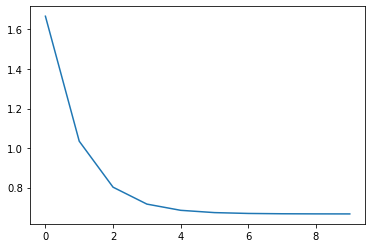

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,10,1)
V = 2/3
y = V+np.exp(-x)
plt.plot(x,y)